# FAST AND SLOW POINTERS

### **Introduction**

In algorithm design and coding interviews, the **Fast and Slow Pointers** technique—also known as the **Tortoise and Hare** algorithm—is a powerful strategy for efficiently solving problems involving data structures like linked lists and arrays. This approach employs two pointers that traverse the structure at different speeds. By leveraging their differing speeds, this method can detect cycles, find the middle of a list, and identify palindromic sequences without requiring additional memory. Mastering the Fast and Slow Pointers technique not only optimizes solutions for better performance but also demonstrates a deep understanding of algorithmic problem-solving, making it an invaluable tool for acing coding interviews.

#### **Concepts**
**LinkedList**
A linked list is a fundamental data structure in computer science that consists of a sequence of elements called nodes, where each node contains two parts: data and a pointer (or reference) to the next node in the sequence. Unlike arrays, linked lists are dynamic and can easily grow or shrink in size, making them efficient for scenarios where frequent insertions and deletions occur. There are various types of linked lists, including singly linked lists, where each node points to the next node, and doubly linked lists, where nodes have pointers to both the next and previous nodes. Linked lists are widely used in applications such as implementing stacks and queues, managing memory dynamically, and handling scenarios that require efficient sequential access without the overhead of resizing, as seen in array-based structures.

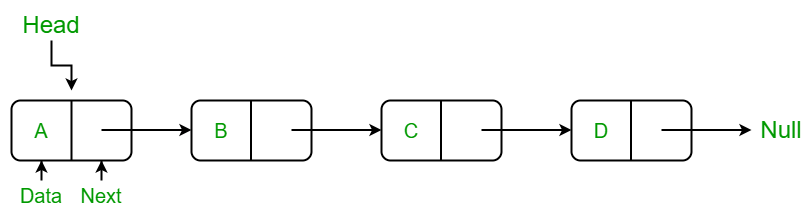

##### **LinkedList Example**

In [73]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None


In [74]:
node1 = ListNode(val=3)
node2 = ListNode(val=2)
node3 = ListNode(val=0)
node4 = ListNode(val=4)
node4.next = node2
node3.next = node4
node2.next = node3
node1.next = node2

ll = LinkedList()
ll.head = node1

In [75]:
node = ll.head
l = []
for i in range(4):
    l.append(node.val)
    node = node.next 

print(l)

[3, 2, 0, 4]


### **Problem**
Given head, the head of a linked list, determine if the linked list has a cycle in it.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to. Note that pos is not passed as a parameter.

Return true if there is a cycle in the linked list. Otherwise, return false.

**Example 1**

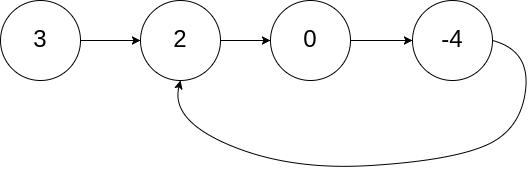


**Input:** head = [3,2,0,-4], pos = 1

**Output**: true

**Explanation:** There is a cycle in the linked list, where the tail connects to the 1st node (0-indexed).

**Example 2**

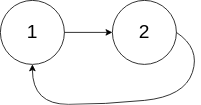


**Input:** head = [1,2], pos = 0

**Output**: true

**Explanation:** There is a cycle in the linked list, where the tail connects to the 0th node.

**Example 3**

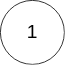


**Input:** head = [1], pos = -1

**Output**: false

**Explanation:** There is no cycle in the linked list.

### **Solution**

In [76]:
def hasCycle(head: LinkedList) -> bool:
    fast = head
    slow = head
    pos = 0
    while fast and fast.next:
        print("fast: ", str(fast.val), ", slow: ", str(slow.val))
        fast = fast.next.next
        slow = slow.next
        if fast == slow:
            print("fast: ", str(fast.val), ", slow: ", str(slow.val))
            return True
        pos += 1
    return False

In [77]:
print(hasCycle(head=ll.head))

fast:  3 , slow:  3
fast:  0 , slow:  2
fast:  2 , slow:  0
fast:  4 , slow:  4
True


### **Problem LinkedList Cycle II**

Given the head of a linked list, return the node where the cycle begins. If there is no cycle, return None.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer.

**Example 1**

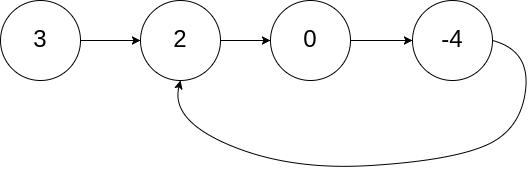

**Input:** head = [3,2,0,-4], pos = 1

**Output**: tail connects to node index 1

**Explanation:** There is a cycle in the linked list, where tail connects to the second node.

**Example 2**

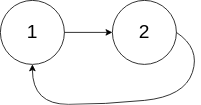


**Input:** head = [1,2], pos = 0

**Output**: tail connects to node index 0

**Explanation:** There is a cycle in the linked list, where tail connects to the first node.


**Example 3**

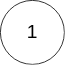


**Input:** head = [1], pos = -1

**Output**: no cycle

**Explanation:** There is no cycle in the linked list.

### **First Solution** - One Pointer

In [78]:
def detectCycle(head: LinkedList) -> int:
    slow = head
    fast = head

    hash_map = set()

    trajectory_fast = []
    
    while fast:
        if fast in hash_map:
            trajectory_fast.append(fast.val)
            print("Trajectory Fast Pointer: ", trajectory_fast)
            print("Cycle detected...")
            rep = fast
            break
        hash_map.add(fast)
        trajectory_fast.append(fast.val)
        print("Trajectory Fast Pointer: ", trajectory_fast)
        fast = fast.next

    if not fast:
        print("No Cycle")
        return fast.val

    print("Start Cycle Value... ", str(fast.val))
    
    trajectory_slow = []
    i = 0
    while slow != rep:
        trajectory_slow.append(slow.val)
        print("Trajectory Slow Pointer: ", trajectory_slow)
        slow = slow.next
        i += 1
    trajectory_slow.append(slow.val)
    print("Trajectory Slow Pointer: ", trajectory_slow)
    print("Cycle Index Start: ", str(i))
    return i

In [79]:
detectCycle(head=ll.head)

Trajectory Fast Pointer:  [3]
Trajectory Fast Pointer:  [3, 2]
Trajectory Fast Pointer:  [3, 2, 0]
Trajectory Fast Pointer:  [3, 2, 0, 4]
Trajectory Fast Pointer:  [3, 2, 0, 4, 2]
Cycle detected...
Start Cycle Value...  2
Trajectory Slow Pointer:  [3]
Trajectory Slow Pointer:  [3, 2]
Cycle Index Start:  1


1

### **Analysis**
**Time Complexity:** O(n)

**Space Complexity:** O(n) *Hash Map worst case length = n*
![image](analysis1.png)

### **Second Solution** - Fast and Slow Pointer

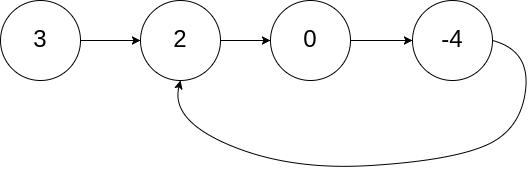

In [80]:
def detectCycle(head: LinkedList) -> int:
    slow = head
    fast = head

    tf = [fast.val]
    ts = [slow.val]
    
    while fast and fast.next:
        print("Trajectory Fast Pointer: ", tf)
        print("Trajectory Slow Pointer: ", ts)
        fast = fast.next.next
        slow = slow.next
        tf.append(fast.val)
        ts.append(slow.val)
        if fast == slow:
            print("Trajectory Fast Pointer: ", tf)
            print("Trajectory Slow Pointer: ", ts)
            break
    if not fast or not fast.next:
        return -1 
    
    print("-------------")
    print("Meeting node: ", str(tf[-1]))
    print("-------------")

    i = 0
    start = head
    st = [start.val]
    while True:
        print("Trajectory Slow Pointer: ", ts)
        print("Trajectory Start Pointer: ", st)
        if start == slow:
            return i
        i += 1
        start = start.next
        slow = slow.next
        ts.append(slow.val)
        st.append(start.val)


In [81]:
print(detectCycle(head=ll.head))

Trajectory Fast Pointer:  [3]
Trajectory Slow Pointer:  [3]
Trajectory Fast Pointer:  [3, 0]
Trajectory Slow Pointer:  [3, 2]
Trajectory Fast Pointer:  [3, 0, 2]
Trajectory Slow Pointer:  [3, 2, 0]
Trajectory Fast Pointer:  [3, 0, 2, 4]
Trajectory Slow Pointer:  [3, 2, 0, 4]
-------------
Meeting node:  4
-------------
Trajectory Slow Pointer:  [3, 2, 0, 4]
Trajectory Start Pointer:  [3]
Trajectory Slow Pointer:  [3, 2, 0, 4, 2]
Trajectory Start Pointer:  [3, 2]
1


### **Analysis**
**Time Complexity:** O(n)

**Space Complexity:** O(1)

![image](analysis2.png)